In [38]:
%load_ext autoreload
%autoreload 2

from preprocess import *
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical

# Second dimension of the feature is dim2
feature_dim_2 = 11
dataset_size_model = -1

# Save data to array file first
save_data_to_array(max_len=feature_dim_2, size_dataset=dataset_size_model)

# Loading train set and test set
X_train, X_test, y_train, y_test = get_train_test()

# # Feature dimension
feature_dim_1 = 20
channel = 1
epochs = 200
batch_size = 100
verbose = 1
num_classes = 8

# Reshaping to perform 2D convolution
X_train = X_train.reshape(X_train.shape[0], feature_dim_1, feature_dim_2, channel)
X_test = X_test.reshape(X_test.shape[0], feature_dim_1, feature_dim_2, channel)

y_train_hot = to_categorical(y_train)
y_test_hot = to_categorical(y_test)


Saving vectors of label - 'erva':   1%|▏         | 4/300 [00:00<00:07, 38.11it/s]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload



Saving vectors of label - 'fumar':  86%|████████▋ | 258/299 [00:05<00:01, 37.22it/s]


Saving vectors of label - 'bed':  84%|████████▍ | 1437/1713 [00:09<00:01, 153.43it/s]


Saving vectors of label - 'happy':  62%|██████▏   | 1073/1742 [00:08<00:04, 153.94it/s]


Saving vectors of label - 'maconha':   8%|▊         | 51/605 [00:25<04:40,  1.98it/s]


Saving vectors of label - 'maconha':  23%|██▎       | 142/605 [01:11<03:44,  2.07it/s]


Saving vectors of label - 'maconha':  39%|███▊      | 233/605 [01:56<03:02,  2.03it/s]


Saving vectors of label - 'maconha':  54%|█████▎    | 324/605 [02:41<02:17,  2.04it/s]


Saving vectors of label - 'maconha':  69%|██████▊   | 415/605 [03:26<01:34,  2.00it/s]


Saving vectors of label - 'maconha':  84%|████████▎ | 506/605 [04:11<00:48,  2.03it/s]


Saving vectors of label - 'maconha':  99%|█████████▊| 597/605 [04:57<00:03,  2.05it/s]


Saving vectors of label - 'cat':  23%|██▎       | 399/1733 [00:03<00:10, 132.01it/s]


Saving vectors of label - 'massa':   3%|▎         | 8/310 [00:00<00:09, 31.42it/s]


Saving vectors of label - 'massa': 100%|██████████| 310/310 [00:08<00:00, 37.62it/s]

In [39]:
def get_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=(feature_dim_1, feature_dim_2, channel)))
    model.add(Conv2D(48, kernel_size=(2, 2), activation='relu'))
    model.add(Conv2D(120, kernel_size=(2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    return model

# Predicts one sample
def predict(filepath, model):
    sample = wav2mfcc(filepath)
    sample_reshaped = sample.reshape(1, feature_dim_1, feature_dim_2, channel)
    return get_labels()[0][
            np.argmax(model.predict(sample_reshaped))
    ]
#     print(model.predict(sample_reshaped))
#     return np.argmax(model.predict(sample_reshaped))

# Building The Model Then Training it

In [40]:
model = get_model()
model.fit(X_train, y_train_hot, batch_size=batch_size, epochs=epochs, verbose=verbose, validation_data=(X_test, y_test_hot))

Train on 4207 samples, validate on 2805 samples
Epoch 1/200
4207/4207 [==============================] - 7s 2ms/step - loss: 1.9418 - acc: 0.3829 - val_loss: 1.0739 - val_acc: 0.5865
Epoch 2/200
4207/4207 [==============================] - 4s 1ms/step - loss: 1.1002 - acc: 0.5947 - val_loss: 1.8406 - val_acc: 0.3622
Epoch 3/200
4207/4207 [==============================] - 4s 927us/step - loss: 0.9393 - acc: 0.6646 - val_loss: 0.6601 - val_acc: 0.7676
Epoch 4/200
4207/4207 [==============================] - 4s 945us/step - loss: 0.7619 - acc: 0.7221 - val_loss: 0.6041 - val_acc: 0.7665
Epoch 5/200
4207/4207 [==============================] - 5s 1ms/step - loss: 0.6983 - acc: 0.7421 - val_loss: 0.8061 - val_acc: 0.7037
Epoch 6/200
4207/4207 [==============================] - 4s 1ms/step - loss: 0.6252 - acc: 0.7761 - val_loss: 0.6217 - val_acc: 0.7747
Epoch 7/200
4207/4207 [==============================] - 4s 975us/step - loss: 0.5557 - acc: 0.8010 - val_loss: 0.5297 - val_acc: 0.8029
E

Epoch 61/200
4207/4207 [==============================] - 4s 947us/step - loss: 0.0278 - acc: 0.9900 - val_loss: 0.8076 - val_acc: 0.8610
Epoch 62/200
4207/4207 [==============================] - 4s 904us/step - loss: 0.0264 - acc: 0.9907 - val_loss: 0.8234 - val_acc: 0.8585
Epoch 63/200
4207/4207 [==============================] - 4s 977us/step - loss: 0.0250 - acc: 0.9924 - val_loss: 0.8122 - val_acc: 0.8585
Epoch 64/200
4207/4207 [==============================] - 4s 993us/step - loss: 0.0291 - acc: 0.9917 - val_loss: 0.8202 - val_acc: 0.8563
Epoch 65/200
4207/4207 [==============================] - 4s 911us/step - loss: 0.0268 - acc: 0.9931 - val_loss: 0.8917 - val_acc: 0.8517
Epoch 66/200
4207/4207 [==============================] - 4s 996us/step - loss: 0.0333 - acc: 0.9891 - val_loss: 0.8659 - val_acc: 0.8606
Epoch 67/200
4207/4207 [==============================] - 4s 1ms/step - loss: 0.0187 - acc: 0.9943 - val_loss: 0.8858 - val_acc: 0.8485
Epoch 68/200
4207/4207 [============

Epoch 121/200
4207/4207 [==============================] - 4s 924us/step - loss: 0.0182 - acc: 0.9955 - val_loss: 1.0808 - val_acc: 0.8610
Epoch 122/200
4207/4207 [==============================] - 4s 875us/step - loss: 0.0270 - acc: 0.9929 - val_loss: 1.0207 - val_acc: 0.8617
Epoch 123/200
4207/4207 [==============================] - 4s 1ms/step - loss: 0.0092 - acc: 0.9964 - val_loss: 0.9801 - val_acc: 0.8592
Epoch 124/200
4207/4207 [==============================] - 4s 969us/step - loss: 0.0154 - acc: 0.9943 - val_loss: 1.0362 - val_acc: 0.8606
Epoch 125/200
4207/4207 [==============================] - 4s 973us/step - loss: 0.0217 - acc: 0.9936 - val_loss: 0.9966 - val_acc: 0.8535
Epoch 126/200
4207/4207 [==============================] - 4s 933us/step - loss: 0.0107 - acc: 0.9964 - val_loss: 1.0027 - val_acc: 0.8556
Epoch 127/200
4207/4207 [==============================] - 4s 975us/step - loss: 0.0181 - acc: 0.9957 - val_loss: 1.0005 - val_acc: 0.8599
Epoch 128/200
4207/4207 [====

4207/4207 [==============================] - 4s 1ms/step - loss: 0.0079 - acc: 0.9976 - val_loss: 1.0795 - val_acc: 0.8674
Epoch 181/200
4207/4207 [==============================] - 4s 853us/step - loss: 0.0089 - acc: 0.9974 - val_loss: 1.1771 - val_acc: 0.8595
Epoch 182/200
4207/4207 [==============================] - 4s 891us/step - loss: 0.0033 - acc: 0.9988 - val_loss: 1.1577 - val_acc: 0.8635
Epoch 183/200
4207/4207 [==============================] - 4s 1ms/step - loss: 0.0075 - acc: 0.9979 - val_loss: 1.1793 - val_acc: 0.8645
Epoch 184/200
4207/4207 [==============================] - 4s 908us/step - loss: 0.0042 - acc: 0.9986 - val_loss: 1.2819 - val_acc: 0.8578
Epoch 185/200
4207/4207 [==============================] - 4s 879us/step - loss: 0.0067 - acc: 0.9981 - val_loss: 1.2266 - val_acc: 0.8617
Epoch 186/200
4207/4207 [==============================] - 4s 879us/step - loss: 0.0054 - acc: 0.9990 - val_loss: 1.2357 - val_acc: 0.8595
Epoch 187/200
4207/4207 [====================

## Prediction

In [41]:
# teste audio 
import random

number_audios_classified = {
    "cat": 0,
    "happy": 0,
    "bed": 0,
    "maconha": 0,
    "erva": 0,
    "fumar": 0,
    "bagulho": 0,
    "massa": 0
}

count_audios_with_term = 0

files_dir = os.listdir('./teste_audio')

random.shuffle(files_dir)

for audio in files_dir:
    prediction = predict('./teste_audio/' + audio, model=model)
    number_audios_classified[prediction] += 1
    print('audio: ' + audio + ' é classificado como: ' + prediction)
    count_audios_with_term += 1


audio: maconha-treinob3dc32b529a54905ba1aab8c18864bdb.wav é classificado como: maconha
audio: maconha-treinoea129fd9e7cc4699bb627f4589925cee.wav é classificado como: fumar
audio: maconha-treino32480a3618d545d38a4fdcef079df093.wav é classificado como: maconha
audio: maconha-treino9e81f0699aed4946881cbd34768d7fe7.wav é classificado como: maconha
audio: maconha-treino9c80175355204f20a0f66cdb72904a55.wav é classificado como: maconha
audio: maconha-treino4cddceb978a3410aaab855bf9fd54984.wav é classificado como: massa
audio: maconha-treinoc8b96140f72d4d6484bb7059eff6968b.wav é classificado como: bagulho
audio: maconha-treino5ba110be7b2a4f058371afef4c6398b2.wav é classificado como: fumar
audio: Clipe 254 é classificado como: erva
audio: maconha-treino651d233f086549b6a8c4cb0238f4b2a0.wav é classificado como: maconha
audio: maconha-treinoe708c8dd346a4f7bb516d824484f5dfe.wav é classificado como: bagulho
audio: maconha-treino37112d814980486bbba1fb970400a1a2.wav é classificado como: erva
audio: Cl

audio: maconha-treino0c1b81fe16c1402fa7fceff97ae0f368.wav é classificado como: massa
audio: maconha-treinoc8f63c0863854338bf1c00874b36d9e6.wav é classificado como: fumar
audio: maconha-treinoa3c20c7e143d4b4cafcf3ca43cfb5865.wav é classificado como: erva
audio: maconha-treinoae3d75748694426ba18cfb30eca7731c.wav é classificado como: fumar
audio: maconha-treino5db6e91eedb8439c8bb7928fcc6fb5a3.wav é classificado como: erva
audio: maconha-treino5d713b074c0e4c63bbec66ea93171d8f.wav é classificado como: maconha
audio: maconha-treino678b8c808d7849918821523e69790c2c.wav é classificado como: fumar


In [42]:
import numpy as np

sum_false_negative = np.sum([number_audios_classified[i] for i in number_audios_classified if i is not 'maconha']) 
print('Número de falso negativos: ' + str(sum_false_negative))
print('Total de audios: %d'%(count_audios_with_term))
percentage_false_negative = (sum_false_negative / count_audios_with_term) * 100
print('Taxa de falso negativo: ' + str(percentage_false_negative) + '%')


Número de falso negativos: 55
Total de audios: 108
Taxa de falso negativo: 50.92592592592593%


In [43]:
import os

number_audios_classified_2 = {
    "cat": 0,
    "happy": 0,
    "bed": 0,
    "maconha": 0,
    "erva": 0,
    "fumar": 0,
    "bagulho": 0,
    "massa": 0
}

count_audios_no_term = 0 

# files from directorie whatsapp
files_dir = os.listdir('/home/captain-rogers/Área de Trabalho/whatsapp/audio_convert')

for audio in files_dir:
    concat_audio_path = '/home/captain-rogers/Área de Trabalho/whatsapp/audio_convert/' + audio 
    
    prediction = predict(concat_audio_path, model=model)
    
    number_audios_classified_2[prediction] += 1 
    
    print('audio: ' + audio + ' é classificado como: ' + prediction)
    count_audios_no_term += 1
    
print(number_audios_classified_2)

audio: convert_7ac4f505-059e-11ea-9680-681401a6b57b.wav é classificado como: cat
audio: convert_6edba72c-059e-11ea-9680-681401a6b57b.wav é classificado como: maconha
audio: convert_7995ebf8-059e-11ea-9680-681401a6b57b.wav é classificado como: massa
audio: convert_4ba596f4-059e-11ea-9680-681401a6b57b.wav é classificado como: massa
audio: convert_541c8bfd-059e-11ea-9680-681401a6b57b.wav é classificado como: cat
audio: convert_4ce00e04-059e-11ea-9680-681401a6b57b.wav é classificado como: massa
audio: convert_668572e7-059e-11ea-9680-681401a6b57b.wav é classificado como: bed
audio: convert_4221aa65-059e-11ea-9680-681401a6b57b.wav é classificado como: fumar
audio: convert_481c2f2a-059e-11ea-9680-681401a6b57b.wav é classificado como: bed
audio: convert_70048778-059e-11ea-9680-681401a6b57b.wav é classificado como: bed
audio: convert_552f5dc9-059e-11ea-9680-681401a6b57b.wav é classificado como: bed
audio: convert_40ea7c88-059e-11ea-9680-681401a6b57b.wav é classificado como: happy
audio: convert

audio: convert_5ab2673e-059e-11ea-9680-681401a6b57b.wav é classificado como: massa
audio: convert_51bcf721-059e-11ea-9680-681401a6b57b.wav é classificado como: fumar
audio: convert_67aa8189-059e-11ea-9680-681401a6b57b.wav é classificado como: fumar
audio: convert_6a1bd982-059e-11ea-9680-681401a6b57b.wav é classificado como: happy
audio: convert_4480bd9c-059e-11ea-9680-681401a6b57b.wav é classificado como: bed
audio: convert_3fbc047f-059e-11ea-9680-681401a6b57b.wav é classificado como: happy
audio: convert_7e75681f-059e-11ea-9680-681401a6b57b.wav é classificado como: happy
audio: convert_61c00562-059e-11ea-9680-681401a6b57b.wav é classificado como: happy
audio: convert_67aa818b-059e-11ea-9680-681401a6b57b.wav é classificado como: happy
audio: convert_67aa818a-059e-11ea-9680-681401a6b57b.wav é classificado como: cat
audio: convert_6a1bd984-059e-11ea-9680-681401a6b57b.wav é classificado como: happy
audio: convert_4f51a891-059e-11ea-9680-681401a6b57b.wav é classificado como: happy
audio: c

audio: convert_772ea921-059e-11ea-9680-681401a6b57b.wav é classificado como: cat
audio: convert_541c8bee-059e-11ea-9680-681401a6b57b.wav é classificado como: cat
audio: convert_6edba727-059e-11ea-9680-681401a6b57b.wav é classificado como: fumar
audio: convert_541c8bef-059e-11ea-9680-681401a6b57b.wav é classificado como: massa
audio: convert_5ab2673b-059e-11ea-9680-681401a6b57b.wav é classificado como: happy
audio: convert_3fbc047a-059e-11ea-9680-681401a6b57b.wav é classificado como: bed
audio: convert_5e2a63e7-059e-11ea-9680-681401a6b57b.wav é classificado como: fumar
audio: convert_46e79b29-059e-11ea-9680-681401a6b57b.wav é classificado como: happy
audio: convert_49535f3b-059e-11ea-9680-681401a6b57b.wav é classificado como: maconha
audio: convert_4ab2b19a-059e-11ea-9680-681401a6b57b.wav é classificado como: happy
audio: convert_4ab2b197-059e-11ea-9680-681401a6b57b.wav é classificado como: maconha
audio: convert_7d29c4a6-059e-11ea-9680-681401a6b57b.wav é classificado como: happy
audio:

audio: convert_50660bb8-059e-11ea-9680-681401a6b57b.wav é classificado como: cat
audio: convert_7268ba79-059e-11ea-9680-681401a6b57b.wav é classificado como: massa
audio: convert_668572ef-059e-11ea-9680-681401a6b57b.wav é classificado como: happy
audio: convert_7399f773-059e-11ea-9680-681401a6b57b.wav é classificado como: cat
audio: convert_4ab2b19d-059e-11ea-9680-681401a6b57b.wav é classificado como: cat
audio: convert_46e79b27-059e-11ea-9680-681401a6b57b.wav é classificado como: maconha
audio: convert_5cf416dd-059e-11ea-9680-681401a6b57b.wav é classificado como: massa
audio: convert_70048771-059e-11ea-9680-681401a6b57b.wav é classificado como: bed
audio: convert_4480bd90-059e-11ea-9680-681401a6b57b.wav é classificado como: happy
audio: convert_481c2f2f-059e-11ea-9680-681401a6b57b.wav é classificado como: happy
audio: convert_5cf416d4-059e-11ea-9680-681401a6b57b.wav é classificado como: cat
audio: convert_3fbc0482-059e-11ea-9680-681401a6b57b.wav é classificado como: bed
audio: convert

audio: convert_6db13d69-059e-11ea-9680-681401a6b57b.wav é classificado como: happy
audio: convert_7995ebfa-059e-11ea-9680-681401a6b57b.wav é classificado como: maconha
audio: convert_4ab2b194-059e-11ea-9680-681401a6b57b.wav é classificado como: cat
audio: convert_5cf416de-059e-11ea-9680-681401a6b57b.wav é classificado como: massa
audio: convert_584993c1-059e-11ea-9680-681401a6b57b.wav é classificado como: cat
audio: convert_74c9b788-059e-11ea-9680-681401a6b57b.wav é classificado como: massa
audio: convert_5f5e127c-059e-11ea-9680-681401a6b57b.wav é classificado como: maconha
audio: convert_584993bb-059e-11ea-9680-681401a6b57b.wav é classificado como: massa
audio: convert_7861dafd-059e-11ea-9680-681401a6b57b.wav é classificado como: maconha
audio: convert_46e79b20-059e-11ea-9680-681401a6b57b.wav é classificado como: cat
audio: convert_40ea7c8a-059e-11ea-9680-681401a6b57b.wav é classificado como: happy
audio: convert_61c00561-059e-11ea-9680-681401a6b57b.wav é classificado como: massa
audi

audio: convert_7e756823-059e-11ea-9680-681401a6b57b.wav é classificado como: maconha
audio: convert_43527367-059e-11ea-9680-681401a6b57b.wav é classificado como: bed
audio: convert_43527360-059e-11ea-9680-681401a6b57b.wav é classificado como: maconha
audio: convert_4f51a896-059e-11ea-9680-681401a6b57b.wav é classificado como: massa
audio: convert_6cd94b84-059e-11ea-9680-681401a6b57b.wav é classificado como: maconha
audio: convert_4ba596ed-059e-11ea-9680-681401a6b57b.wav é classificado como: maconha
audio: convert_584993bd-059e-11ea-9680-681401a6b57b.wav é classificado como: massa
audio: convert_541c8bf6-059e-11ea-9680-681401a6b57b.wav é classificado como: maconha
audio: convert_67aa8187-059e-11ea-9680-681401a6b57b.wav é classificado como: cat
audio: convert_7f9b9ce2-059e-11ea-9680-681401a6b57b.wav é classificado como: bed
audio: convert_62ef25d0-059e-11ea-9680-681401a6b57b.wav é classificado como: maconha
audio: convert_4f51a890-059e-11ea-9680-681401a6b57b.wav é classificado como: bed


audio: convert_772ea91d-059e-11ea-9680-681401a6b57b.wav é classificado como: fumar
audio: convert_668572ee-059e-11ea-9680-681401a6b57b.wav é classificado como: maconha
audio: convert_7399f776-059e-11ea-9680-681401a6b57b.wav é classificado como: maconha
audio: convert_552f5dcc-059e-11ea-9680-681401a6b57b.wav é classificado como: maconha
audio: convert_7268ba76-059e-11ea-9680-681401a6b57b.wav é classificado como: massa
audio: convert_59754d2e-059e-11ea-9680-681401a6b57b.wav é classificado como: cat
audio: convert_7d29c4ae-059e-11ea-9680-681401a6b57b.wav é classificado como: massa
audio: convert_7861db02-059e-11ea-9680-681401a6b57b.wav é classificado como: happy
audio: convert_74c9b784-059e-11ea-9680-681401a6b57b.wav é classificado como: maconha
audio: convert_45b62f3b-059e-11ea-9680-681401a6b57b.wav é classificado como: cat
audio: convert_7861dafb-059e-11ea-9680-681401a6b57b.wav é classificado como: bed
audio: convert_7d29c4ac-059e-11ea-9680-681401a6b57b.wav é classificado como: maconha


audio: convert_7995ebf5-059e-11ea-9680-681401a6b57b.wav é classificado como: happy
audio: convert_6cd94b87-059e-11ea-9680-681401a6b57b.wav é classificado como: bed
audio: convert_45b62f3a-059e-11ea-9680-681401a6b57b.wav é classificado como: maconha
audio: convert_40ea7c89-059e-11ea-9680-681401a6b57b.wav é classificado como: bed
audio: convert_4352735b-059e-11ea-9680-681401a6b57b.wav é classificado como: bed
audio: convert_4ba596ef-059e-11ea-9680-681401a6b57b.wav é classificado como: cat
audio: convert_45b62f44-059e-11ea-9680-681401a6b57b.wav é classificado como: massa
audio: convert_7399f771-059e-11ea-9680-681401a6b57b.wav é classificado como: happy
audio: convert_6416ae9f-059e-11ea-9680-681401a6b57b.wav é classificado como: happy
audio: convert_5ab2673d-059e-11ea-9680-681401a6b57b.wav é classificado como: massa
audio: convert_40ea7c8c-059e-11ea-9680-681401a6b57b.wav é classificado como: bed
audio: convert_4221aa63-059e-11ea-9680-681401a6b57b.wav é classificado como: maconha
audio: con

In [44]:
print('Número de falsos positivos: ' + str(number_audios_classified_2['maconha']))
print('Total de audios: %d'%(count_audios_no_term))
percentage_false_positive = (number_audios_classified_2['maconha'] / count_audios_no_term) * 100
print('Taxa de falso positivo: %.2f%%'%(percentage_false_positive))

Número de falsos positivos: 215
Total de audios: 800
Taxa de falso positivo: 26.88%


# Testing the dataset witth all the audios toguether

In [241]:
import os

number_audios_maconha = 10
number_others_audios = 790
false_negative_test_2 = 0
false_positive_test_2 = 0

files_dir = os.listdir('/home/captain-rogers/Área de Trabalho/whatsapp/audios')

for audio in files_dir:
    concat_audio_path = '/home/captain-rogers/Área de Trabalho/whatsapp/audios/' + audio 
    
    prediction = predict(concat_audio_path, model=model)
    
    if 'maconha' in audio and prediction != 'maconha':
        false_negative_test_2 += 1
    elif ('maconha' in audio) == False and prediction == 'maconha':
        false_positive_test_2 += 1
    print('audio: ' + audio + ' é classificado como: ' + prediction)


audio: PTT-20181109-WA0125.opus é classificado como: maconha
audio: PTT-20181026-WA0113.opus é classificado como: maconha
audio: PTT-20181030-WA0099.opus é classificado como: maconha
audio: PTT-20181109-WA0072.opus é classificado como: maconha
audio: PTT-20181021-WA0028.opus é classificado como: maconha
audio: PTT-20181109-WA0021.opus é classificado como: bed
audio: PTT-20181101-WA0006.opus é classificado como: bed
audio: PTT-20180929-WA0012.opus é classificado como: maconha
audio: PTT-20180907-WA0005.opus é classificado como: cat
audio: PTT-20181109-WA0016.opus é classificado como: bed
audio: PTT-20181101-WA0171.opus é classificado como: bed
audio: PTT-20181109-WA0144.opus é classificado como: cat
audio: PTT-20181105-WA0037.opus é classificado como: happy
audio: PTT-20181024-WA0065.opus é classificado como: happy
audio: PTT-20181026-WA0114.opus é classificado como: cat
audio: PTT-20181009-WA0172.opus é classificado como: happy
audio: PTT-20180930-WA0030.opus é classificado como: macon

audio: PTT-20181026-WA0131.opus é classificado como: maconha
audio: PTT-20181101-WA0140.opus é classificado como: bed
audio: PTT-20180908-WA0073.opus é classificado como: cat
audio: PTT-20181105-WA0030.opus é classificado como: maconha
audio: PTT-20180908-WA0077.opus é classificado como: maconha
audio: PTT-20181027-WA0056.opus é classificado como: cat
audio: PTT-20181006-WA0038.opus é classificado como: maconha
audio: PTT-20181008-WA0031.opus é classificado como: maconha
audio: PTT-20181109-WA0165.opus é classificado como: bed
audio: PTT-20181109-WA0100.opus é classificado como: maconha
audio: PTT-20181107-WA0073.opus é classificado como: maconha
audio: PTT-20181102-WA0104.opus é classificado como: happy
audio: PTT-20181107-WA0026.opus é classificado como: happy
audio: PTT-20181102-WA0106.opus é classificado como: maconha
audio: aa4e563aa10e48088874ce908d884d28.opus é classificado como: cat
audio: PTT-20181103-WA0087.opus é classificado como: bed
audio: PTT-20181103-WA0033.opus é class

audio: PTT-20181101-WA0099.opus é classificado como: maconha
audio: PTT-20181009-WA0055.opus é classificado como: cat
audio: PTT-20181104-WA0109.opus é classificado como: happy
audio: maconha_6 é classificado como: maconha
audio: PTT-20181001-WA0128.opus é classificado como: bed
audio: PTT-20181103-WA0055.opus é classificado como: maconha
audio: PTT-20181102-WA0165.opus é classificado como: cat
audio: PTT-20181103-WA0032.opus é classificado como: maconha
audio: PTT-20181001-WA0144.opus é classificado como: cat
audio: PTT-20181109-WA0124.opus é classificado como: bed
audio: PTT-20180905-WA0109.opus é classificado como: bed
audio: PTT-20181027-WA0105.opus é classificado como: cat
audio: PTT-20181109-WA0074.opus é classificado como: happy
audio: PTT-20181101-WA0136.opus é classificado como: happy
audio: PTT-20180919-WA0003.opus é classificado como: maconha
audio: PTT-20181003-WA0011.opus é classificado como: cat
audio: PTT-20181101-WA0074.opus é classificado como: cat
audio: PTT-20181021-

audio: PTT-20181009-WA0168.opus é classificado como: happy
audio: PTT-20181108-WA0043.opus é classificado como: cat
audio: PTT-20181027-WA0048.opus é classificado como: cat
audio: PTT-20181109-WA0116.opus é classificado como: maconha
audio: PTT-20181028-WA0106.opus é classificado como: bed
audio: PTT-20181106-WA0028.opus é classificado como: bed
audio: PTT-20181029-WA0050.opus é classificado como: maconha
audio: PTT-20181028-WA0101.opus é classificado como: happy
audio: PTT-20180831-WA0009.opus é classificado como: maconha
audio: PTT-20181010-WA0079.opus é classificado como: maconha
audio: PTT-20181102-WA0108.opus é classificado como: cat
audio: PTT-20180920-WA0003.opus é classificado como: maconha
audio: PTT-20181101-WA0113.opus é classificado como: bed
audio: PTT-20181106-WA0009.opus é classificado como: cat
audio: PTT-20181109-WA0134.opus é classificado como: maconha
audio: PTT-20181013-WA0030.opus é classificado como: maconha
audio: PTT-20181109-WA0039.opus é classificado como: bed

audio: PTT-20181028-WA0027.opus é classificado como: maconha
audio: PTT-20181101-WA0157.opus é classificado como: happy
audio: PTT-20181104-WA0106.opus é classificado como: maconha
audio: PTT-20181101-WA0075.opus é classificado como: maconha
audio: PTT-20181102-WA0139.opus é classificado como: cat
audio: PTT-20181108-WA0024.opus é classificado como: bed
audio: PTT-20181002-WA0011.opus é classificado como: cat
audio: PTT-20181109-WA0163.opus é classificado como: bed
audio: PTT-20181029-WA0026.opus é classificado como: cat
audio: PTT-20181109-WA0132.opus é classificado como: maconha
audio: PTT-20181101-WA0093.opus é classificado como: maconha
audio: PTT-20181027-WA0107.opus é classificado como: happy
audio: PTT-20181107-WA0040.opus é classificado como: maconha
audio: PTT-20181027-WA0060.opus é classificado como: cat
audio: PTT-20181013-WA0031.opus é classificado como: maconha
audio: PTT-20181109-WA0081.opus é classificado como: bed
audio: PTT-20181105-WA0082.opus é classificado como: cat

audio: PTT-20181026-WA0076.opus é classificado como: maconha
audio: PTT-20181107-WA0022.opus é classificado como: maconha
audio: PTT-20181030-WA0098.opus é classificado como: maconha
audio: PTT-20181102-WA0101.opus é classificado como: happy
audio: PTT-20181010-WA0048.opus é classificado como: cat
audio: PTT-20180919-WA0004.opus é classificado como: maconha
audio: PTT-20181030-WA0026.opus é classificado como: maconha
audio: PTT-20181101-WA0125.opus é classificado como: maconha
audio: PTT-20181101-WA0133.opus é classificado como: maconha
audio: PTT-20181009-WA0171.opus é classificado como: cat
audio: PTT-20181103-WA0078.opus é classificado como: cat
audio: maconha_3 é classificado como: maconha
audio: PTT-20181101-WA0004.opus é classificado como: cat
audio: PTT-20181028-WA0167.opus é classificado como: cat
audio: PTT-20181106-WA0044.opus é classificado como: bed
audio: PTT-20181010-WA0065.opus é classificado como: maconha
audio: PTT-20181109-WA0032.opus é classificado como: bed
audio: P

In [242]:
print('Número de falsos negativos: %d' %(false_negative_test_2))

percentual_teste2_fn = ( false_negative_test_2 / number_audios_maconha ) * 100.0
print('Percentual falso negativo: %2.f%%\n\n'%(percentual_teste2_fn))

print('Número de falsos positivos: %d' %(false_positive_test_2))

percentual_teste2_fp = ( false_positive_test_2 / number_others_audios ) * 100.0
print('Percentual falso positivo: %2.f%%'%(percentual_teste2_fp))

Número de falsos negativos: 0
Percentual falso negativo:  0%


Número de falsos positivos: 345
Percentual falso positivo: 44%


In [ ]:
teste = predict('./teste4', model=model)

print(teste)

##  Audio with expression "maconha" inside represent in waveplot and spectogram image 

Populating the interactive namespace from numpy and matplotlib


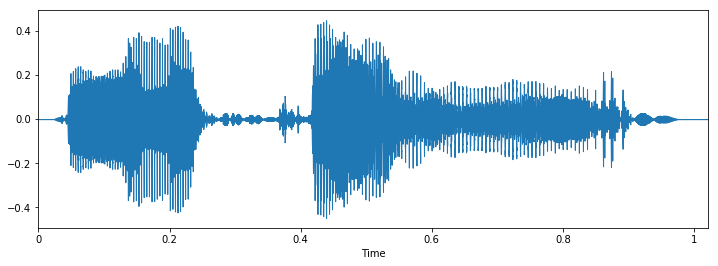

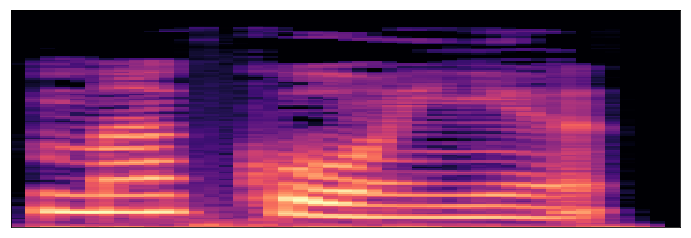

In [78]:
%pylab inline
import os
import pandas as pd
import librosa
import librosa.display
import glob

# Audio with expression "maconha" inside with another terms
data, sampling_rate = librosa.load('./maconha940df744-e579-11e9-a5a8-681401a6b57b.mp3')

yt, index = librosa.effects.trim(data)

plt.figure(figsize=(12,4))
librosa.display.waveplot(yt, sr=sampling_rate)

S = librosa.feature.melspectrogram(y=yt, sr=sampling_rate)
S_dB = librosa.power_to_db(S, ref=np.max)
plt.figure(figsize=(12,4))
librosa.display.specshow(S_dB, sr=sampling_rate)


## Unique "maconha" expression audio in waveplot and spectogram image 

In [ ]:
# an audio with an expression unique "maconha"
data, sampling_rate = librosa.load('./data/maconha/maconha-0a5388ecab714fab84f39b6948270fbe.wav')

plt.figure(figsize=(12,4))
librosa.display.waveplot(data, sr=sampling_rate)

S = librosa.feature.melspectrogram(y=data, sr=sampling_rate)
S_dB = librosa.power_to_db(S, ref=np.max)
plt.figure(figsize=(12,4))
librosa.display.specshow(S_dB, sr=sampling_rate)

# Análise de bechmark

In [14]:
# save the information about statistic in csv to show in table

import pandas as pd

def save_data_analyse(filename):
    data = pd.DataFrame({
                         "Qtd dataset": [], 
                         "Falso positivo": [],
                         "Falso negativo": [],
                         "Porcentagem FP": [],
                         "Porcentagem FN": []
                        })

    try:
        data = pd.read_csv(filename, sep = ',')
    except FileNotFoundError:
        with open( filename, 'w'):
            data.to_csv( filename, index=False)
            print(data)
    except pd.errors.EmptyDataError:
        data.to_csv( filename, index=False)
        print(data)

    if filename == 'save.csv' or filename == 'new_test.csv':
        data_add = pd.DataFrame({
            "Qtd dataset": [dataset_size_model], 
            "Falso positivo": [number_audios_classified_2['maconha']],
            "Falso negativo": [sum_false_negative],
            "Porcentagem FP": [percentage_false_positive],
            "Porcentagem FN": [percentage_false_negative]
        })
    elif filename == 'save_test2.csv':
        data_add = pd.DataFrame({
            "Qtd dataset": [dataset_size_model], 
            "Falso positivo": [false_positive_test_2],
            "Falso negativo": [false_negative_test_2],
            "Porcentagem FP": [percentual_teste2_fp],
            "Porcentagem FN": [percentual_teste2_fn]
        })

    print(data)

    data = data.append(data_add)
    open( filename, "w").close()
    data.to_csv( filename, index=False)

In [15]:
import matplotlib.pyplot as plt
import  pandas as pd

def plot_table_csv(filename):
    data = pd.read_csv( filename )
    cell_text = data.values.tolist()

    # Prepare table
    columns = (
        'Qtd dataset',
        'Falso positivo', 
        'Falso negativo', 
        'Porcentagem FP(%)', 
        'Porcentagem FN(%)'
    )

    # Add a table at the bottom of the axes
    colors = [["#56b5fd","w","w","w","w"]]

    for i in range( len(cell_text) - 1 ):
        colors.append(["#56b5fd","w","w","w","w"])

    fig, ax = plt.subplots()
    ax.axis('tight')
    ax.axis('off')
    the_table = ax.table(cellText=cell_text,cellColours=colors,
                        colWidths=[.4]*5, colLabels=columns,loc='center')

    the_table.set_fontsize(20)
    the_table.scale(1, 2)

    plt.show()

In [243]:
save_data_analyse('save_test2.csv')

   Qtd dataset  Falso positivo  Falso negativo  Porcentagem FP  Porcentagem FN
0           50             128               4       16.202532            40.0
1          100             380               1       48.101266            10.0
2          200             226               0       28.607595             0.0
3          300             228               2       28.860759            20.0


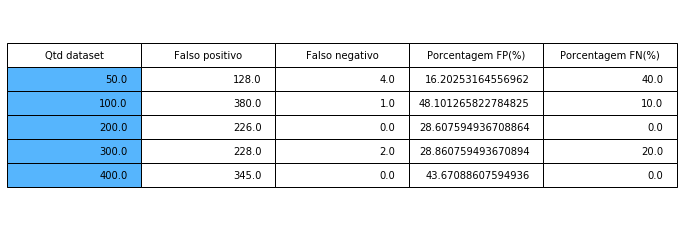

In [244]:
plot_table_csv('save_test2.csv')

In [45]:
save_data_analyse('new_test.csv')

   Qtd dataset  Falso positivo  Falso negativo  Porcentagem FP  Porcentagem FN
0        100.0           221.0            58.0          27.625       53.703704
1        200.0           281.0            51.0          35.125       47.222222
2        300.0           165.0            61.0          20.625       56.481481


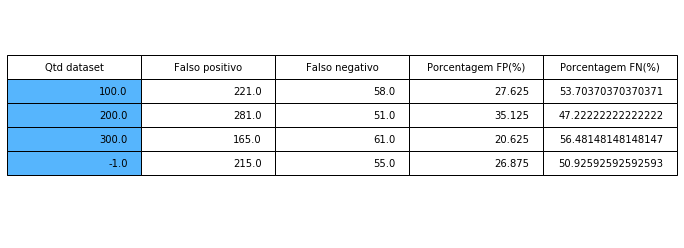

In [46]:
plot_table_csv('new_test.csv')

In [76]:
from pydub import AudioSegment 
from pydub.silence import split_on_silence

sound_file = AudioSegment.from_wav('./teste.wav')
audio_chunks = split_on_silence(sound_file,
                                min_silence_len=1000,
                                silence_thresh=-16
                               )

for i, chunk in enumerate(audio_chunks):
    output_file = 'teste{%d}'.format(i)
    print('exporting', output_file)
    chunk.export(output_file, format="wav")
